IA & Data science (3i026) -- 2018-2019
--------
*&copy; Equipe pédagogique: Manon Ansart, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*


# TD-TME02: les k-plus proches voisins (*k-NN*)

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

CARNIELLI Ariana

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-02</tt> et rajouter à la suite de <tt>tme-02</tt> les noms des membres du binômes séparés par un tiret.

Par exemple, pour le binôme Luke Skywalker et Han Solo, le nom de fichier devient : <pre>tme-02-Skywalker-Solo</pre>

Penser à sauvegarder fréquemment le fichier en cours de travail :
- soit en cliquant sur l'icône "disquette"
- soit par la combinaison de touches [Ctrl]-S

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-02-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">** à la fin de la séance**</font>. C'est ce compte-rendu qui donne la note de base de la séance.
- vous pouvez éventuellement compléter votre compte-rendu  pour obtenir des points bonus, dans ce cas, vous devez soumettre votre complément avant le début de la semaine suivante.

** Sur la page Moodle de remise du travail <font color="RED">ne pas oublier d'envoyer le compte rendu</font>** à la fin de la séance, la soumission de la version complémentaire post-séance se fera sur une page différente.

## Présentation ##

Dans ce TME, nous allons mettre en place une "architecture" de code nous permettant petit à petit de tester différents modèles d'apprentissage supervisé et programmer les k-NN. Nous allons nous restreindre au cas binaire où les données sont étiquetées $+1$ ou $-1$.


### Objectifs de ce TME 1

Le travail à réaliser est le suivant :
- apprendre à utiliser jupyter notebook
- se documenter sur les structures de données qui seront utilisées pour programmer tout au long du semestre
- implémenter des fonctions pour les mesures vues en cours 

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

**Remarque :** La concaténation de vecteurs s'obtient à l'aide de la fonction `vstack` de numpy.

In [2]:
# Exemple d'utilisation de vstack (pour plus de détails, chercher la documentation sur le web)

vecteur_1 = np.array([0, 1.5, 4.2])
vecteur_2 = np.array([1.1, 3.8, 20.01])

vecteur_3 = vecteur_1 + vecteur_2

np.vstack( (vecteur_1, vecteur_2, vecteur_3) )

array([[ 0.  ,  1.5 ,  4.2 ],
       [ 1.1 ,  3.8 , 20.01],
       [ 1.1 ,  5.3 , 24.21]])

### Représentation orientée objets


Pour implémenter nos algorithmes d'apprentissage et pour représenter les données, nous allons utiliser quelques éléments de programmation orientée objet (POO) qu'autorise le langage Python. 

Si vous ne connaissez rien à la POO, il est fortement conseillé de lire une documentation ou suivre un tutorial sur le web (par exemple, http://apprendre-python.com/page-apprendre-programmation-orientee-objet-poo-classes-python-cours-debutants).


## Étape 1: dataset

La première étape consiste à définir une classe, la classe LabelSet, pour stocker les données d'apprentissage, de validation et de test. Nous considérerons que les données tiennent en mémoire.

La classe LabelSet sert donc à stocker des couples $\{(x_1,y_1),...,(x_n,y_n)\}$. Les $x_i$ et $y_i$ seront des tableaux numpy.

**A noter : ** la méthode <tt>\_\_init\_\_</tt> est le constructeur de la classe.


In [3]:
class LabeledSet:  
    """ Classe pour représenter un ensemble d'exemples (base d'apprentissage)
        Variables d'instance :
            - input_dimension (int) : dimension de la description d'un exemple (x)
            - nb_examples (int) : nombre d'exemples dans l'ensemble
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de LabeledSet
            Argument: 
                - intput_dimension (int) : dimension de x
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        self.nb_examples = 0
    
    def addExample(self,vector,label):
        """ Ajout d'un exemple dans l'ensemble
            Argument: 
                - vector ()
                - label (int) : classe de l'exemple (+1 ou -1)
            
        """
        if (self.nb_examples == 0):
            self.x = np.array([vector])
            self.y = np.array([label])
        else:
            self.x = np.vstack((self.x, vector))
            self.y = np.vstack((self.y, label))
        
        self.nb_examples = self.nb_examples + 1
    
    def getInputDimension(self):
        """ Renvoie la dimension de l'espace d'entrée
        """
        return self.input_dimension
    
    def size(self):
        """ Renvoie le nombre d'exemples dans l'ensemble
        """
        return self.nb_examples
    
    def getX(self, i):
        """ Renvoie la description du i-eme exemple (x_i)
        """
        return self.x[i]
    
    #
    def getY(self, i):
        """ Renvoie la classe de du i-eme exemple (y_i)
        """
        return(self.y[i])

In [4]:
# Exemple d'utilisation de LabeledSet

une_base = LabeledSet(2)        # définition d'une base pour contenir des exemples en 2D
une_base.addExample([0, 1],1)   # ajout de l'exemple (0, 1) de classe +1
une_base.addExample([2, 3],1)   # ajout de l'exemple (2, 3) de classe +1
une_base.addExample([1, 2],-1)  # ajout de l'exemple (1, 2) de classe -1
une_base.addExample([2, 2],-1)  # ajout de l'exemple (2, 2) de classe -1


<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction <tt>affiche_base</tt> qui, étant donné un LabeledSet, permet d'afficher tous les exemples qu'il contient.

In [5]:
def affiche_base(base):
    """Affiche le conteu du LabeledSet base.
    """
    nb_lignes = base.size()
    for i in range(nb_lignes):
        print("Exemple " + str(i))
        print("\tdescription :  {}".format(base.getX(i)))
        print("\tlabel :  {}".format(base.getY(i)))
    

In [6]:
affiche_base(une_base)

Exemple 0
	description :  [0 1]
	label :  [1]
Exemple 1
	description :  [2 3]
	label :  [1]
Exemple 2
	description :  [1 2]
	label :  [-1]
Exemple 3
	description :  [2 2]
	label :  [-1]


Un dataset en 2 dimensions pourra être affiché en utilisant matplotlib et plus précisément la fonction `matplotlib.pyplot.scatter` permettant de dessiner un nuage de points - http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter -

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 

def plot2DSet(set):
    """ LabeledSet -> NoneType
        Hypothèse: set est de dimension 2
        affiche une représentation graphique du LabeledSet
        remarque: l'ordre des labels dans set peut être quelconque
    """
    S_pos = set.x[np.where(set.y == 1),:][0]      # tous les exemples de label +1
    S_neg = set.x[np.where(set.y == -1),:][0]     # tous les exemples de label -1
    plt.scatter(S_pos[:,0],S_pos[:,1],marker='o') # 'o' pour la classe +1
    plt.scatter(S_neg[:,0],S_neg[:,1],marker='x') # 'x' pour la classe -1


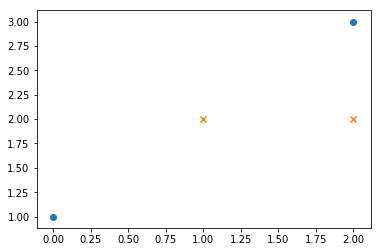

In [8]:
# Par exemple :
plot2DSet(une_base)

### Génération de données ''Jouet''

Nous allons pour l'instant nous intéresser à des datasets "jouet" générés selon des distributions choisies à la main. 

Commençons par un dataset en 2 dimensions (entrée) et 1 dimension (sortie): $x_i \in \mathbb{R}^2$, $y_i \in \{-1;+1\}$ tel que les données sont générées selon deux gaussiennes. Pour cela, nous utiliserons la fonction `numpy.random.multivariate_normal` - http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multivariate_normal.html

<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction <tt>createGaussianDataset</tt> qui, étant donné 5 arguments:
- `positive_center` est le centre de la gaussienne des points positifs (vecteur de taille 2)
- `positive_sigma` est la variance de la gaussienne des points positifs (sous forme de matrice 2*2)
- `negative_center` est le centre de la gaussienne des points négative (vecteur de taille 2)
- `negative_sigma` est la variance de la gaussienne des points négative (sous forme de matrice 2*2)
- `nb_points` est le nombre de points de chaque classe à générer

rend un dataset généré aléatoirement.

In [9]:
def createGaussianDataset(positive_center, positive_sigma, negative_center, negative_sigma, nb_points):
    """"Crée un dataset aléatoire 2D. Prend en argument :
    - positive_center : centre de la gaussienne des points positifs (vecteur de taille 2)
    - positive_sigma : variance de la gaussienne des points positifs (sous forme de matrice 2*2)
    - negative_center : centre de la gaussienne des points négative (vecteur de taille 2)
    - negative_sigma : variance de la gaussienne des points négative (sous forme de matrice 2*2)
    - nb_points : nombre de points de chaque classe à générer
    Retourne le dataset aléatoire crée.
    """
    res = LabeledSet(2)
    for i in range(nb_points):    
    #La méthode addExample ne permet l'ajout d'une seule donnée à la fois.
        res.addExample(np.random.multivariate_normal(positive_center, positive_sigma), 1)
        res.addExample(np.random.multivariate_normal(negative_center, negative_sigma), -1)
    
    return res

Taille de la base jouet générée : 20 exemples


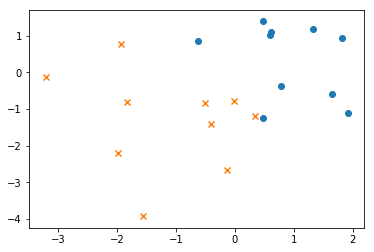

In [10]:
# Exemple d'utilisation:

the_set = createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),10)

print("Taille de la base jouet générée :", the_set.size(), "exemples")

# Affichage :
plot2DSet(the_set)


Dans ce petit dataset, on observe que les deux classes de points sont plutôt bien séparées, car les points +1 sont centrés en [1, 1] et les -1, en [-1, -1], avec une variance pas trop grande dans chaque classe.

Taille de la base jouet générée : 2000 exemples


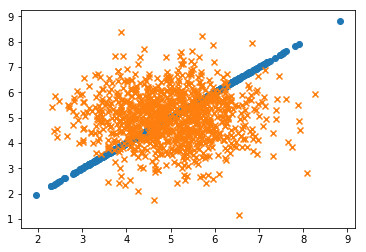

In [11]:
the_set = createGaussianDataset(np.array([5,5]),np.array([[1,1],[1,1]]),np.array([5,5]),np.array([[1,0],[0,1]]),1000)

print("Taille de la base jouet générée :", the_set.size(), "exemples")

# Affichage :
plot2DSet(the_set)

En changeant les moyennes et la matrice de covariance, on change la distribution des poins générés. Avec la covariance maximale, les données générées s'alignent sur une droite.

## Étape 2: les classifieurs

Un classifieur (binaire dans ce cours) permet, pour chaque point d'entrée donné, de calculer un score. Si le score est négatif, la donnée est associée à la classe $-1$, sinon à la classe $+1$. 

Les classifieurs que l'on va implémenter seront définis à l'aide d'une classe qui va dériver de la classe Classifier suivante. Cette classe est une classe "abstraite", elle sera dérivée par héritage pour définir des classifieurs particuliers (knn, arbres de décision, etc.).

Par conséquent, pour l'instant les méthodes `train` et `predict` ne seront pas définies car elles dépendent du modèle que l'on choisira.

Par contre, la fonction `accuracy` renvoie le pourcentage de points bien classés. Elle peut être définie dès maintenant.

<font color="RED" size="+1">**[Q]**</font> Donner l'implémentation de la fonction `accuracy`.

In [12]:
class Classifier:
    """ Classe pour représenter un classifieur
        Attention: cette classe est une classe abstraite, elle ne peut pas être
        instanciée.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
            Hypothèse : input_dimension > 0
        """
        raise NotImplementedError("Please Implement this method")
        
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
        raise NotImplementedError("Please Implement this method")

    def train(self, labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        
        raise NotImplementedError("Please Implement this method")
    
    def accuracy(self, dataset):
        """ Permet de calculer la qualité du système 
        """
        ok = 0
        taille_data = dataset.size()
        for i in range(taille_data):
            if (dataset.getY(i) * self.predict(dataset.getX(i))) > 0:
            #On dit qu'une prédiction est correcte si elle a le même signe que 
            #la valeur correspondante à cette donnée dans le dataset.
                ok+=1
        return (ok/taille_data)*100
        #On renvoie un pourcentage (donc le rapport multiplié par 100)

Nous allons maintenant définir un **classifieur linéaire aléatoire** en étendant la classe Classifier et en implémentant le constructeur ainsi que les 2 méthodes `predict` et `train`.

Pour un classifieur linéaire aléatoire:
- dans le constructeur, on doit générer aléatoirement un vecteur $w$ de taille `input_dimension` aléatoirement
- pour ce classifieur, la méthode `train` ne fait rien. On ne mettra qu'un print permettant d'afficher le message "Pas d'apprentissage pour ce classifieur"
- pour une description d'exemple $x$, la méthode `predict` doit utiliser la valeur de $\langle x | w\rangle$ pour prédire le label (+1 ou -1) associé


<font color="RED" size="+1">**[Q]**</font> Donner l'implémentation de la classe ClassifierRandom qui hérite de la classe Classifier et permet de définir un classifieur linéaire aléatoire.

In [13]:
class ClassifierRandom(Classifier):
    """ Classe pour représenter un classifieur linéaire aléatoire
        Cette classe hérite de la classe Classifier
    """
    def __init__(self, input_dimension):
        self.input_dimension = input_dimension
        #chaque composante de w est choisi entre -1 et 1
        self.w = 2*np.random.random(input_dimension) - 1
        self.w = self.w / np.linalg.norm(self.w)
    
    def predict(self, x):
        """ rend la prediction sur x (entre -1 ou +1)
        """
        norm_x = x / np.linalg.norm(x)
        return np.dot(self.w, norm_x)

    def train(self, labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        print("Pas d'apprentissage pour ce classifieur")

Dans le constructeur on choisi un vecteur `w` aléatoire de norme 1. Dans `predict` on normalise d'abord `x` avant de calculer sont produit scallaire avec `w`. Comme cela, le résultat envoyé est toujours entre -1 et 1 (cosinus de l'angle entre les deux vecteurs), ce qui peut être utile pour mesurer le degré de certitude du résultat.

In [14]:
# Création d'un classifieur linéaire aléatoire de dimension 2:

un_classifieur = ClassifierRandom(2)

<font color="RED" size="+1">**[Q]**</font> Calculer la performance (*accuracy*) d'un classifieur linéaire aléatoire sur un ensemble de 100 points générés aléatoirement.

Accuracy du classifieur aléatoire : 0.3%


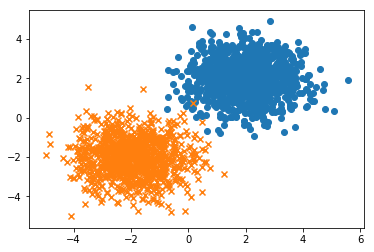

In [28]:
set_test = createGaussianDataset(np.array([2,2]),np.array([[1,0],[0,1]]),np.array([-2,-2]),np.array([[1,0],[0,1]]),1000)
un_classifieur = ClassifierRandom(2)
plot2DSet(set_test)
print("Accuracy du classifieur aléatoire : " + str(un_classifieur.accuracy(set_test)) + "%")

On a choisi un dataset avec deux classes bien separées, ce qui faciliterait la prediction. Néanmoins, comme `w` est choisi de façon aléatoire, la prédiction n'est pas toujours satisfaisante, comme c'est le cas de l'exemple ci-dessus.

Voici une fonction qui permet de dessiner la frontière de decision d'un classifieur. La valeur `step` permet de choisir la précision du dessin.

In [16]:
def plot_frontiere(set,classifier,step=10):
    """ LabeledSet * Classifier * int -> NoneType
        Remarque: le 3e argument est optionnel et donne la "résolution" du tracé
        affiche la frontière de décision associée au classifieur
    """
    mmax=set.x.max(0)
    mmin=set.x.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    plt.contourf(x1grid,x2grid,res,colors=["red","cyan"],levels=[-1000,0,1000])

Accuracy du classifieur aléatoire : 0.3%


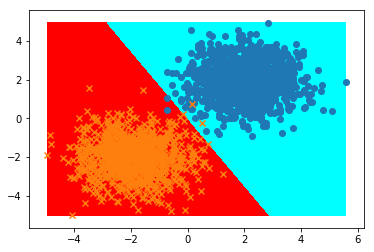

In [30]:
classifieur_random=ClassifierRandom(2)

plot_frontiere(set_test,classifieur_random, step=200)
plot2DSet(set_test)
print("Accuracy du classifieur aléatoire : " + str(un_classifieur.accuracy(set_test)) + "%")

Dans c'est cas, l'accuracy est très petite car le classifieur aléatoire a bien séparé les deux ensembles mais les classifications correspondants ont été échangées.

## Étape 3 : k-NN

De la même façon que nous avons défini un classifieur aléatoire, nosu allons maintenant un classifieur par $k$ plus proches voisins (ou k-NN). 

Pour cela nous allons construire un tableau de distances que nous trierons grâce à la méthode `numpy.argsort`.

Pour un classifieur linéaire aléatoire:
- dans le constructeur, on précise, en plus de la dimension, le nombre de voisins à utiliser (valeur de $k$)
- dans la méthode `train`, on constitue la base de points de référence en mémorisant le LabeledSet donné
- pour une description d'exemple $x$, la méthode `predict` doit construire un tableau de distances aux points de référence, puis le trier grâce à la méthode `numpy.argsort`.


<font color="RED" size="+1">**[Q]**</font> Donner l'implémentation de la classe ClassifierKNN qui hérite de la classe Classifier et permet de définir un classifieur par k-NN.

In [18]:
class ClassifierKNN(Classifier):
    def __init__(self, input_dimension, k):
        self.input_dimension = input_dimension
        self.k = k
    
    def predict(self, x):
        """ rend la prediction sur x (entre -1 ou +1)
        """
        taille = self.trainData.size()
        #calcule le tableau de distances
        tab_dist = np.zeros(taille)
        for i in range(taille):
            tab_dist[i] = np.linalg.norm(self.trainData.getX(i) - x)
        #selection des k plus proches voisins
        ind_mins = np.argsort(tab_dist)[:self.k]
        #calcule du score
        cpt_pos = 0
        cpt_min = 0
        for i in ind_mins:
            if self.trainData.getY(i) > 0:
                cpt_pos+=1
            else:
                cpt_min+=1
        return (cpt_pos - cpt_min)/(cpt_pos + cpt_min)

    def train(self, labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        self.trainData = labeledSet

Comme pour le classifieur aléatoire, la valeur de retour de `predict` est comprise entre -1 et 1 et peut être utilisé pour mesurer le degré de certitude du résultat. On a fait le choix de ne pas prendre en considération la distance des k-NN au point qu'on essaie de classifier. On pourrait par exemple pondérer les résultats des k-NN points pour que les voisins le plus proches aient un voix plus important.

100.0

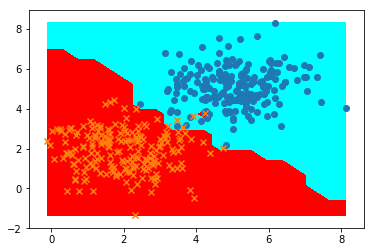

In [31]:
# Exemple d'utilisation :
the_set = createGaussianDataset(np.array([5,5]),np.array([[1,0],[0,1]]),np.array([2,2]),np.array([[1,0],[0,1]]),200)
knn = ClassifierKNN(2,1)
knn.train(the_set)

plot_frontiere(the_set,knn,20)
plot2DSet(the_set) 

La division calculé par le classifieur entre les deux types de points n'est pas linéaire : la frontière entre les deux régions n'est pas une droite.

## Étape 4: protocole expérimental

Attention, lorsque l'on évalue un classifieur, il est nécessaire de considérer deux ensembles distincts: un ensemble d'apprentissage et un ensemble de test. La performance doit être évaluée sur l'ensemble de test (et non pas sur l'ensemble d'apprentissage).

<font color="RED" size="+1">**[Q]**</font> Donner les instructions permettant d'évaluer un classifieur KNN et comparer les résultats obtenus avec ceux obtenus par un classifieur linéaire aléatoire sur le même jeu de données.

Pas d'apprentissage pour ce classifieur
l'accuracy du classifieur aleatoire est = 15.0
l'accuracy du classifieur knn est = 91.0


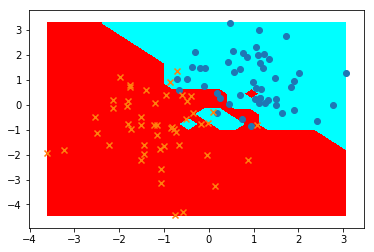

In [20]:
set_learn = createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),50)
set_test = createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),50)

knn = ClassifierKNN(2,1)
ale = ClassifierRandom(2)

ale.train(set_learn)
knn.train(set_learn)

print("l'accuracy du classifieur aleatoire est = " + str(ale.accuracy(set_test)))
print("l'accuracy du classifieur knn est = " + str(knn.accuracy(set_test)))

plot_frontiere(set_test,knn,20)
plot2DSet(set_test) 


On observe en tournant plusieurs fois la cellule ci-dessus que le classifieur par knn avec k = 1 a toujours une performance autour des 90%, alors que le classifieur aléatoire a tout type de performance entre 0% et 100%, suivant le vecteur `w` aléatoire choisi.

### Différentes expérimentations

<font color="RED" size="+1">**[Q]**</font> Comparer la performance (en train et test) de plusieurs classifieurs KNN avec différentes valeurs de k. Que pouvez vous constater ?
Idéalement, vous tracerez la performance (accuracy) en fonction de la valeur de k.
Essayez avec différentes configurations de gaussiennes.

[100.    93.94  93.3   93.36  92.6   91.86  92.06  92.4 ]
[87.84 90.36 90.92 91.48 91.18 90.8  91.54 91.44]


Text(0.5, 1.0, 'Accuracy par rapport au nombre k de voisins considerés')

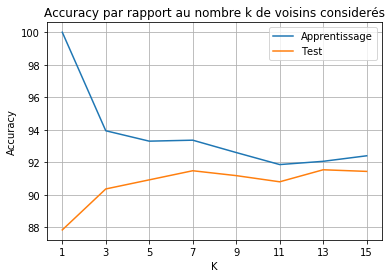

In [39]:
tab_k = np.arange(1, 16, 2)
tab_acc_learn = np.zeros(tab_k.size)
tab_acc_test = np.zeros(tab_k.size)

for i in range(tab_k.size):
    for j in range (50):
        set_learn = createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),50)
        set_test = createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),50)
        knn = ClassifierKNN(2,tab_k[i])
        knn.train(set_learn)
        tab_acc_learn[i] += knn.accuracy(set_learn)
        tab_acc_test[i] += knn.accuracy(set_test)
    
tab_acc_learn = tab_acc_learn / 50
tab_acc_test = tab_acc_test / 50

print(tab_acc_learn)
print(tab_acc_test)

fig, ax = plt.subplots()
ax.grid(True)
plt.xlabel("K")
plt.ylabel("Accuracy")
ax.set_xticks(tab_k)
ax.plot(tab_k, tab_acc_learn, label = 'Apprentissage') 
ax.plot(tab_k, tab_acc_test, label = 'Test')

ax.legend(loc = "upper right")
plt.title("Accuracy par rapport au nombre k de voisins considerés")

On remarque que l'accuracy sur les données d'entrainement vaut toujours 100% pour k = 1 et montre une tendance décroissante lorsque k augmente. D'autre part, l'accuracy sur les données de test a une tendance croissante avec l'augmentation de k. Pour k petit, on a ainsi un phénomène d'overfit, où le modèle est trop adapté aux données d'entraînement et a donc plus du mal à classifier les données de test. Lorsque k augmente, le overfit diminue et la performance du classifieur sur les données de test augmente. La performance varie très peu sur les deux ensembles de données pour k trop grand, elle reste essentiellement constante pour k >= 7. Comme le temps de calcul augmente avec le k, il est donc préférable de choisir une valeur de k assez grande pour éviter l'overfit mais pas trop grande pour limiter le temps de calcul.

Lorsque l'on change les paramètres des deux gaussiennes, le comportement des courbes reste le même mais les valeurs numériques des performances changent. Quand on rapproche leurs moyennes ou augmente leurs variances, les deux ensembles sont plus difficilement séparables, et donc la performance diminue, alors que, en éloignant leurs moyennes ou diminuant leurs variances, les ensembles sont plus facilement séparables et la performance augmente.

## Étape 5 : données réelles UCI

Plusieurs datasets sont téléchargeables depuis: http://mldata.org

Voir : https://scikit-learn.org/0.19/datasets/mldata.html

Voici la fonction permettant de les charger (en spécifiant leur nom). La fonction se charge de charger les données depuis le web.

In [40]:
#from sklearn.datasets import fetch_mldata
#
#def loadFile(name):
#    data = fetch_mldata(name, data_home='.')
#    print(data.data.shape)
#    unique=np.unique(data.target)
#    for i in range(len(data.target)):
#        if (data.target[i]==unique[0]):
#            data.target[i]=1
#        else:
#            data.target[i]=-1
#            
#loadFile('breast-cancer_scale')
#Les donnees sont dans data.data et data.target


Le dataset utilisé a été recuperée de l'adresse: https://archive.ics.uci.edu/ml/datasets/iris 

In [47]:
iris_pd = pd.read_csv("data/bezdekIris.data.csv", header = None, names = ["s_length", "s_width", "p_length", "p_width", "name"])

iris_pd.head()


,s_length,s_width,p_length,p_width,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
iris_pd_test = iris_pd[iris_pd["name"]!="Iris-setosa"]
iris_pd_test.head()

,s_length,s_width,p_length,p_width,name
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [53]:
iris_test = LabeledSet(4)
res = 0
for i, r, in iris_pd_test.iterrows():
    if r["name"] == "Iris-versicolor":
        res = 1
    else:
        res = -1
    iris_test.addExample(np.array([r["s_length"], r["s_width"], r["p_length"], r["p_width"]]),res)   # ajout des vecteurs du dataset
    

In [54]:
affiche_base(iris_test)

Exemple 0
	description :  [7.  3.2 4.7 1.4]
	label :  [1]
Exemple 1
	description :  [6.4 3.2 4.5 1.5]
	label :  [1]
Exemple 2
	description :  [6.9 3.1 4.9 1.5]
	label :  [1]
Exemple 3
	description :  [5.5 2.3 4.  1.3]
	label :  [1]
Exemple 4
	description :  [6.5 2.8 4.6 1.5]
	label :  [1]
Exemple 5
	description :  [5.7 2.8 4.5 1.3]
	label :  [1]
Exemple 6
	description :  [6.3 3.3 4.7 1.6]
	label :  [1]
Exemple 7
	description :  [4.9 2.4 3.3 1. ]
	label :  [1]
Exemple 8
	description :  [6.6 2.9 4.6 1.3]
	label :  [1]
Exemple 9
	description :  [5.2 2.7 3.9 1.4]
	label :  [1]
Exemple 10
	description :  [5.  2.  3.5 1. ]
	label :  [1]
Exemple 11
	description :  [5.9 3.  4.2 1.5]
	label :  [1]
Exemple 12
	description :  [6.  2.2 4.  1. ]
	label :  [1]
Exemple 13
	description :  [6.1 2.9 4.7 1.4]
	label :  [1]
Exemple 14
	description :  [5.6 2.9 3.6 1.3]
	label :  [1]
Exemple 15
	description :  [6.7 3.1 4.4 1.4]
	label :  [1]
Exemple 16
	description :  [5.6 3.  4.5 1.5]
	label :  [1]
Exemple

<font color="RED" size="+1">**[Q]**</font> Écrire la fonction `split` permettant de découper un labeledSet données en 2: un ensemble d'apprentissage et un ensemble de test.

In [55]:
def split(l_set,  p_train = 0.85):
    """
    Sépare le LabeledSet l_set de façon aléatoire en deux LabeledSet, 
    l'un pour l'entrainement et l'autre pour les tests. 
    Le paramètre p_train donne la probabilité qu'une entrée de l_set soit mise dans le LabeledSet d'entrainement.
    """
    l_set_train = LabeledSet(l_set.getInputDimension())
    l_set_test = LabeledSet(l_set.getInputDimension())
    taille = l_set.size()
    for i in range(taille):
        if np.random.rand() < p_train:
            l_set_train.addExample(l_set.getX(i), l_set.getY(i))
        else:
            l_set_test.addExample(l_set.getX(i), l_set.getY(i))
    return l_set_train, l_set_test

Comme les deux types de données, +1 et -1, sont séparées dans les deux LabeledSet avec la même probabilité, leur proportion sera préservée, en moyenne, par rapport à leur proportion originelle dans l_set.

<font color="RED" size="+1">**[Q]**</font> Tester différents k-NN , pour différentes valeurs de $k$, et tracer la courbe de performance (accuracy) pour les données d'apprentissage et les données de test.

[100.          94.34875256  95.55766882  96.08147253  96.88035239
  96.41131246  96.65162995  96.88868306  96.43358687  95.97781256
  95.8105534 ]
[90.95932639 93.72683867 94.99871947 95.43164672 94.33270745 96.02968594
 95.18130534 94.76252269 95.24236016 95.10479383 94.71707758]


Text(0.5, 1.0, 'Accuracy par rapport au nombre k de voisins considerés')

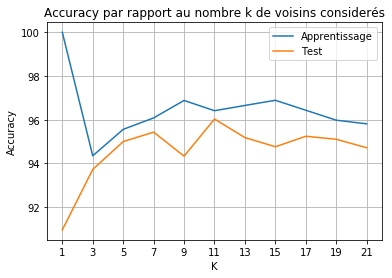

In [59]:
tab_k = np.arange(1, 22, 2)
tab_acc_learn = np.zeros(tab_k.size)
tab_acc_test = np.zeros(tab_k.size)

for i in range(tab_k.size):
    for j in range (50):
        set_learn, set_test = split(iris_test,  p_train = 0.85) 
        knn = ClassifierKNN(2,tab_k[i])
        knn.train(set_learn)
        tab_acc_learn[i] += knn.accuracy(set_learn)
        tab_acc_test[i] += knn.accuracy(set_test)
    
tab_acc_learn = tab_acc_learn / 50
tab_acc_test = tab_acc_test / 50

print(tab_acc_learn)
print(tab_acc_test)

fig, ax = plt.subplots()
ax.grid(True)
plt.xlabel("K")
plt.ylabel("Accuracy")
ax.set_xticks(tab_k)
ax.plot(tab_k, tab_acc_learn, label = 'Apprentissage') 
ax.plot(tab_k, tab_acc_test, label = 'Test')

ax.legend(loc = "upper right")
plt.title("Accuracy par rapport au nombre k de voisins considerés")

L'accuracy a essentiellement le même comportement que dans les données générées aléatoirement. Elle est très bonne, de l'ordre de 95% sur les données de test, car les données utilisées sont bien séparées, comme l'on peut voir en regardant le fichier .csv avec les données.